In [2]:
import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
import os
from torch.utils.data import Dataset
from PIL import Image

from albumentations.augmentations.crops.transforms import RandomCrop
from albumentations.augmentations.geometric.rotate import Rotate
from albumentations.augmentations.transforms import HorizontalFlip, RGBShift
from albumentations.pytorch import ToTensorV2
import cv2
import albumentations as A

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data_dir = 'C:\\Users\\91865\\Desktop\\Cat_Dog_data'
train_dir = data_dir + '\\train'
test_dir = data_dir + '\\test'
classes = os.listdir(train_dir)
classes

['cat', 'dog']

In [ ]:
# os.listdir(test_dir)
os.listdir(os.path.join(test_dir,'cat'))


In [5]:
data = []
for index,name in enumerate(classes):
    files =  os.listdir(os.path.join(test_dir,name))
    data+= list(zip(files,[index]*len(files)))
# data

## Custom Dataset

In [6]:
# train_transforms = A.Compose([A.Resize(width = 224, height = 224),
#                                 A.RandomCrop(width = 224, height = 224),
#                                 A.Rotate(limit = 40, p = 0.9, border_mode = cv2.BORDER_CONSTANT), 
#                                 A.HorizontalFlip(p = 0.5),
#                                 A.VerticalFlip(p = 0.1),
#                                 A.Normalize(mean = [0.485, 0.456, 0.406], 
#                                             std = [0.229, 0.224, 0.225]),
#                                 ToTensorV2()])

# test_transforms = A.Compose([A.Resize(width = 224, height = 224),
#                                 A.RandomCrop(width = 224, height = 224),
#                                 A.Normalize(mean = [0.485, 0.456, 0.406], 
#                                             std = [0.229, 0.224, 0.225]),
#                                 ToTensorV2()])

# train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
# test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

# trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
# testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [7]:
class CustomImageFolder(Dataset):
    def __init__(self,root_dir,transform=None):
        super(CustomImageFolder,self).__init__()
        
        self.data = []
        self.root_dir = root_dir
        self.transform = transform
        self.class_names = os.listdir(root_dir)
        
        for index,name in enumerate(self.class_names):
            files =  os.listdir(os.path.join(self.root_dir,name))
            self.data+= list(zip(files,[index]*len(files)))
            
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        
        imgfile,label =  self.data[index]
        rodir = os.path.join(self.root_dir,classes[label])
        image = np.array(Image.open(os.path.join(rodir, imgfile)))
#         image = io.imread(os.path.join(rodir, imgfile))
#         img = torch.from_numpy(image)
#         img = img.permute(2,0,1)
#         label = torch.tensor([label])

        
        if self.transform:
            augmentations = self.transform(image=image)
            image = augmentations["image"]
        
        return image,label

In [8]:
train_transform = A.Compose([A.Resize(width = 224, height = 224),
                                A.RandomCrop(width = 224, height = 224),
                                A.Rotate(limit = 40, p = 0.9, border_mode = cv2.BORDER_CONSTANT), 
                                A.HorizontalFlip(p = 0.5),
                                A.VerticalFlip(p = 0.1),
                                A.Normalize(mean = [0.485, 0.456, 0.406], 
                                            std = [0.229, 0.224, 0.225]),
                                ToTensorV2()])

test_transform = A.Compose([A.Resize(width = 224, height = 224),
                                A.RandomCrop(width = 224, height = 224),
                                A.Normalize(mean = [0.485, 0.456, 0.406], 
                                            std = [0.229, 0.224, 0.225]),
                                ToTensorV2()])

train_data = CustomImageFolder(root_dir=train_dir,transform=train_transform)
test_data = CustomImageFolder(root_dir=test_dir,transform=test_transform)

# test_data
print(len(train_data),len(test_data))

22500 2500


In [ ]:
for x,y in test_data:
    print(x.shape)

In [10]:
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

In [11]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([20, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


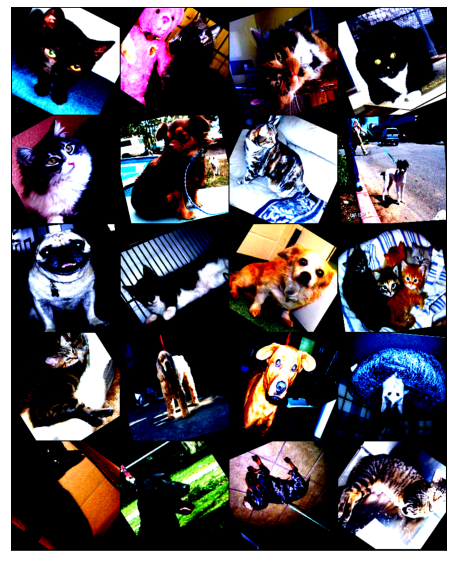

In [12]:
for images, labels in train_loader:
    
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break

<ipython-input-13-12bd7e90045f>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats

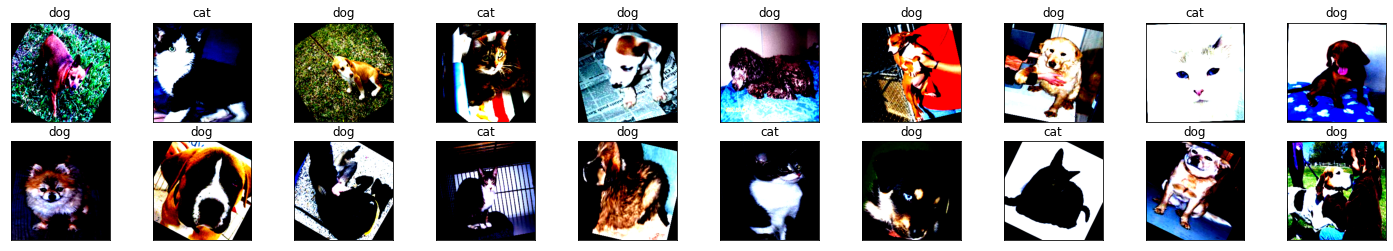

In [13]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

## using RESnet

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(pretrained=True)
# model

In [15]:
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
fc = nn.Sequential(nn.Linear(2048,512),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(512,2),
                      nn.LogSoftmax(dim = 1)
                      )
model.fc = fc

In [16]:
criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.fc.parameters(), lr=0.003) # only the changes values

model.to(device);

In [17]:
epochs = 1
steps = 0
running_loss = 0
print_every = 5

for epoch in range(epochs):
    for images, labels in train_loader:
        steps += 1
        
            # Move input and label tensors to the default device
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            
            model.eval()
            
            with torch.no_grad():
                for images, labels in test_loader:
                    
                    images, labels = images.to(device), labels.to(device)
                    
                    logps = model(images)
                    loss = criterion(logps, labels)
                    test_loss += loss.item()
                    
                    # accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor))
                    
                print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(test_loader):.3f}.. "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
            running_loss = 0
            model.train()
                    
                    

c:\users\91865\appdata\local\programs\python\python39\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1/1.. Train loss: 2.751.. Test loss: 0.350.. Test accuracy: 0.860
Epoch 1/1.. Train loss: 0.904.. Test loss: 0.162.. Test accuracy: 0.968
Epoch 1/1.. Train loss: 0.573.. Test loss: 0.191.. Test accuracy: 0.931
Epoch 1/1.. Train loss: 0.488.. Test loss: 0.112.. Test accuracy: 0.974
Epoch 1/1.. Train loss: 0.251.. Test loss: 0.101.. Test accuracy: 0.974
Epoch 1/1.. Train loss: 0.189.. Test loss: 0.090.. Test accuracy: 0.976
Epoch 1/1.. Train loss: 0.201.. Test loss: 0.083.. Test accuracy: 0.975
Epoch 1/1.. Train loss: 0.141.. Test loss: 0.086.. Test accuracy: 0.976
Epoch 1/1.. Train loss: 0.122.. Test loss: 0.086.. Test accuracy: 0.970
Epoch 1/1.. Train loss: 0.203.. Test loss: 0.170.. Test accuracy: 0.930
Epoch 1/1.. Train loss: 0.199.. Test loss: 0.119.. Test accuracy: 0.954
Epoch 1/1.. Train loss: 0.281.. Test loss: 0.149.. Test accuracy: 0.938
Epoch 1/1.. Train loss: 0.300.. Test loss: 0.069.. Test accuracy: 0.978
Epoch 1/1.. Train loss: 0.174.. Test loss: 0.073.. Test accuracy

KeyboardInterrupt: 

In [76]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
images = images.cuda()
images.shape
# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
# preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().detach().numpy())
preds = preds_tensor.cpu().detach().numpy()

preds
# # plot the images in the batch, along with predicted and true labels
# fig = plt.figure(figsize=(25, 4))
# for idx in np.arange(20):
#     ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
#     plt.imshow(np.transpose(images[idx], (1, 2, 0)))
#     ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
#                  color=("green" if preds[idx]==labels[idx].item() else "red"))

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [19]:
yes = 0
no = 0
for i in range(len(preds)):
    print(classes[preds[i]], classes[labels[i]])
    if (classes[preds[i]] == classes[labels[i]]):
        yes+=1
    else:
        no+=1

print(yes,no)

cat cat
dog dog
cat cat
dog dog
dog dog
dog dog
dog dog
cat cat
cat cat
cat cat
dog dog
cat cat
cat cat
cat cat
dog dog
cat cat
cat cat
cat cat
cat cat
dog dog
20 0


## Visualize my own

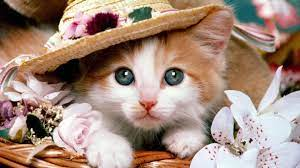

In [70]:
img = Image.open('eilae.jpg')
img

In [71]:
# img_tensor = test_transform(img).to('cuda').unsqueeze(0)
# img_tensor[0].shape
img = np.array(img)
augmentations = test_transform(image=img)
# len(augmentations)
newi = augmentations['image']
newi = newi.unsqueeze(0)
newi.shape

torch.Size([1, 3, 224, 224])

In [72]:
train_on_gpu = True
# move model inputs to cuda, if GPU available
if train_on_gpu:
    newi = newi.cuda()

# get sample outputs
output = model(newi)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())


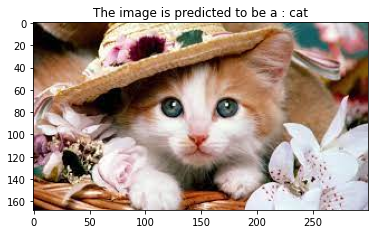

In [84]:
plt.title('The image is predicted to be a : ' + classes[preds_tensor[0]])
plt.imshow(img)

In [81]:
classes[preds_tensor[0]]

'cat'